In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls drive/MyDrive/Group2_Mini_Project/Capstone_Project_Data/stock
!ls drive/MyDrive/Group2_Mini_Project/Capstone_Project_Data/gold

 BAJAJHFL_5minute.csv	  JINDALSTEL_5minute.csv        PNB_5minute.csv
 GAIL_5minute.csv	  JIOFIN_5minute.csv	        POWERGRID_5minute.csv
 HAVELLS_5minute.csv	  JSWENERGY_5minute.csv         RECLTD_5minute.csv
 HCLTECH_5minute.csv	  JSWSTEEL_5minute.csv	        RELIANCE_5minute.csv
 HDFCBANK_5minute.csv	  KOTAKBANK_5minute.csv         SBILIFE_5minute.csv
 HDFCLIFE_5minute.csv	  LICI_5minute.csv	        SBIN_5minute.csv
 HEROMOTOCO_5minute.csv   LODHA_5minute.csv	        SHREECEM_5minute.csv
 HINDALCO_5minute.csv	  LT_5minute.csv	        SHRIRAMFIN_5minute.csv
 HINDUNILVR_5minute.csv   LTIM_5minute.csv	        SIEMENS_5minute.csv
 HYUNDAI_5minute.csv	  MARUTI_5minute.csv	        SUNPHARMA_5minute.csv
 ICICIBANK_5minute.csv	  MM_5minute.csv	        SWIGGY_5minute.csv
 ICICIGI_5minute.csv	  MOTHERSON_5minute.csv         TATACONSUM_5minute.csv
 ICICIPRULI_5minute.csv   NAUKRI_5minute.csv	        TATAMOTORS_5minute.csv
 INDHOTEL_5minute.csv	  NESTLEIND_5minute.csv         TATAPOWER_5minute

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("drive/MyDrive/Group2_Mini_Project/Capstone_Project_Data/stock/NIFTY 50_5minutedata.csv", parse_dates=['date'])
df_gold = pd.read_csv("drive/MyDrive/Group2_Mini_Project/Capstone_Project_Data/gold/XAU_1d_data.csv", delimiter=';', parse_dates=['Date'])
df_crude = pd.read_csv("drive/MyDrive/Group2_Mini_Project/Capstone_Project_Data/crude/Crude_Oil_data.csv", parse_dates=['date'])

In [ ]:
#Check max and min dates for each dataset
print("Max and Min for Nifty")
print(df['date'].max())
print(df['date'].min())

print("Max and Min for Gold")
print(df_gold['Date'].max())
print(df_gold['Date'].min())

print("Max and Min for Gold")
print(df_crude['date'].max())
print(df_crude['date'].min())


Max and Min for Nifty
2025-08-07 15:25:00
2015-01-09 09:15:00
Max and Min for Gold
2025-07-15 00:00:00
2004-06-11 00:00:00
Max and Min for Gold
2024-06-24 00:00:00
2000-08-23 00:00:00


In [ ]:
#lets consider 3 years worth of data for analysis . Start date = 2022-01-01 to 2025-06-01
from datetime import date
df_subset = df[ (df['date'] >= pd.Timestamp(date(2022,1,1))) & (df['date'] < pd.Timestamp(date(2024,6,1)))]
df_gold_subset = df_gold[ (df_gold['Date'] >= pd.Timestamp(date(2022,1,1))) & (df_gold['Date'] < pd.Timestamp(date(2024,6,1)))]
df_crude_subset = df_crude[ (df_crude['date'] >= pd.Timestamp(date(2022,1,1))) & (df_crude['date'] < pd.Timestamp(date(2024,6,1)))]

In [ ]:
#For EDA lets get daily values of nifty instead of 5 minute value
df_subset['date_new'] = df_subset['date'].dt.date

/tmp/ipython-input-2580697724.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['date_new'] = df_subset['date'].dt.date


In [ ]:
#Since index does not have volume data lets drop volume column
df_subset.drop(['volume','date'], axis=1, inplace=True)

/tmp/ipython-input-1839515473.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset.drop(['volume','date'], axis=1, inplace=True)


In [ ]:
df_subset = df_subset.rename(columns={'date_new':'Date'})
df_crude_subset = df_crude_subset.rename(columns={'date':'Date'})

In [ ]:
df_subset = df_subset.groupby('Date').agg({'open':'first', 'high':'max', 'low':'min', 'close':'last'}).reset_index()
df_subset['Date'] = pd.to_datetime(df_subset['Date'])

In [ ]:
df_merged = pd.merge(df_subset, df_gold_subset, on='Date')

In [ ]:
df_merged_compare = df_merged[['Date','close','Close']]
df_merged_compare = df_merged_compare.rename(columns={'close':'nifty_close','Close':'gold_close'})

df_merged_compare = pd.merge(df_merged_compare, df_crude_subset[['Date','close']],  on='Date')
df_merged_compare = df_merged_compare.rename(columns={'close':'crude_close'})

In [ ]:
df_merged_compare

,Date,nifty_close,gold_close,crude_close
0,2022-01-03,17635.35,1801.20,76.080002
1,2022-01-04,17807.35,1814.36,76.989998
2,2022-01-05,17907.70,1810.53,77.849998
3,2022-01-06,17746.00,1789.72,79.459999
4,2022-01-07,17818.20,1796.30,78.900002
...,...,...,...,...
570,2024-05-24,22952.00,2333.86,77.720001
571,2024-05-28,22868.65,2361.13,79.830002
572,2024-05-29,22705.80,2338.00,79.230003
573,2024-05-30,22557.10,2342.98,77.910004


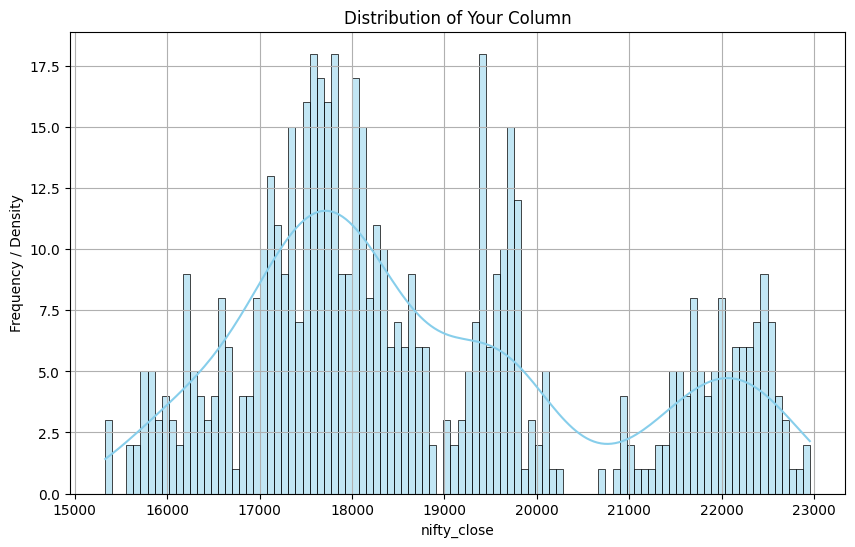

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# plt.plot(df_subset['close'])
# plt.hist(df_merged_compare['nifty_close'])
plt.figure(figsize=(10, 6))
sns.histplot(df_merged_compare['nifty_close'], kde=True, color='skyblue', bins=100)
plt.title('Distribution of Your Column')
plt.xlabel('nifty_close')
plt.ylabel('Frequency / Density')
plt.grid(True)
plt.show()

In [ ]:
#From the above histogrm we can say that the price has stayed in certain ranges which are actually resistance and support zones historically


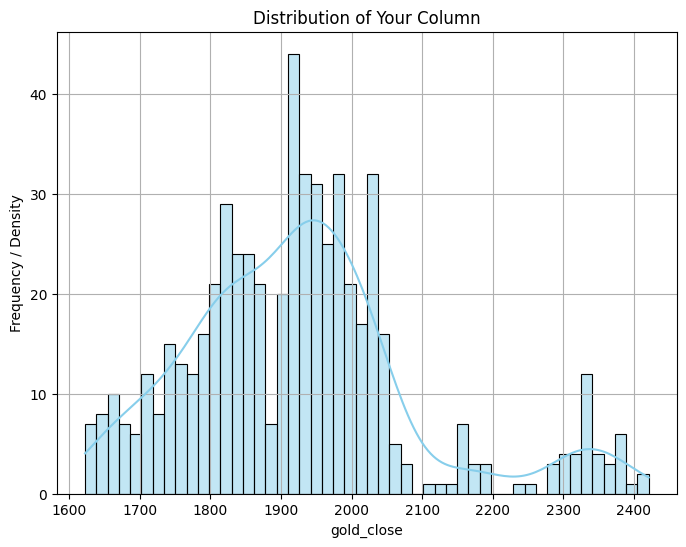

In [ ]:
import matplotlib.pyplot as plt

# plt.plot(df_subset['close'])
# plt.hist(df_merged_compare['gold_close'])
plt.figure(figsize=(8, 6))
sns.histplot(df_merged_compare['gold_close'], kde=True, color='skyblue', bins=50)
plt.title('Distribution of Your Column')
plt.xlabel('gold_close')
plt.ylabel('Frequency / Density')
plt.grid(True)
plt.show()

In [ ]:
def add_daily_returns(df, price_col='Close', method='percentage'):
    """
    Adds a Daily_Return column to a DataFrame from closing prices.

    Parameters:
        df (pd.DataFrame): DataFrame with a price column.
        price_col (str): Column name with closing prices.
        method (str): 'percentage' for % change, 'log' for log returns.

    Returns:
        pd.DataFrame: Original DataFrame with a new 'Daily_Return' column.
    """
    if method == 'percentage':
        df[f"{'Daily_Return'}_{price_col}"] = df[price_col].pct_change()*100
    elif method == 'log':
        import numpy as np
        df['Daily_Return'] = np.log(df[price_col] / df[price_col].shift(1))
    else:
        raise ValueError("Method must be 'percentage' or 'log'")

    return df

df_merged_compare = add_daily_returns(df_merged_compare, price_col='nifty_close', method='percentage')
df_merged_compare = add_daily_returns(df_merged_compare, price_col='gold_close', method='percentage')
df_merged_compare = add_daily_returns(df_merged_compare, price_col='crude_close', method='percentage')

In [ ]:
df_merged_compare

,Date,nifty_close,gold_close,crude_close,Daily_Return_nifty_close,Daily_Return_gold_close,Daily_Return_crude_close
0,2022-01-03,17635.35,1801.20,76.080002,NaN,NaN,NaN
1,2022-01-04,17807.35,1814.36,76.989998,0.975314,0.730624,1.196104
2,2022-01-05,17907.70,1810.53,77.849998,0.563531,-0.211094,1.117029
3,2022-01-06,17746.00,1789.72,79.459999,-0.902964,-1.149387,2.068080
4,2022-01-07,17818.20,1796.30,78.900002,0.406852,0.367655,-0.704754
...,...,...,...,...,...,...,...
570,2024-05-24,22952.00,2333.86,77.720001,0.004357,0.228039,1.105761
571,2024-05-28,22868.65,2361.13,79.830002,-0.363149,1.168451,2.714875
572,2024-05-29,22705.80,2338.00,79.230003,-0.712110,-0.979616,-0.751595
573,2024-05-30,22557.10,2342.98,77.910004,-0.654899,0.213003,-1.666035


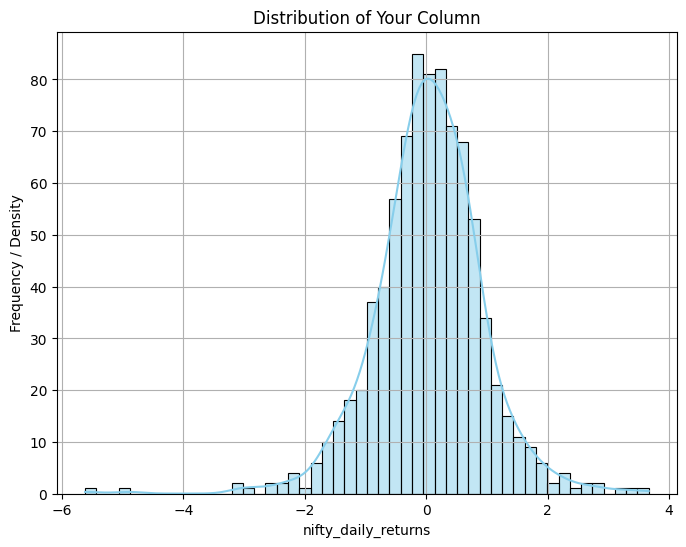

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df_merged_compare['Daily_Return_nifty_close'], kde=True, color='skyblue', bins=50)
plt.title('Distribution of Your Column')
plt.xlabel('nifty_daily_returns')
plt.ylabel('Frequency / Density')
plt.grid(True)
plt.show()

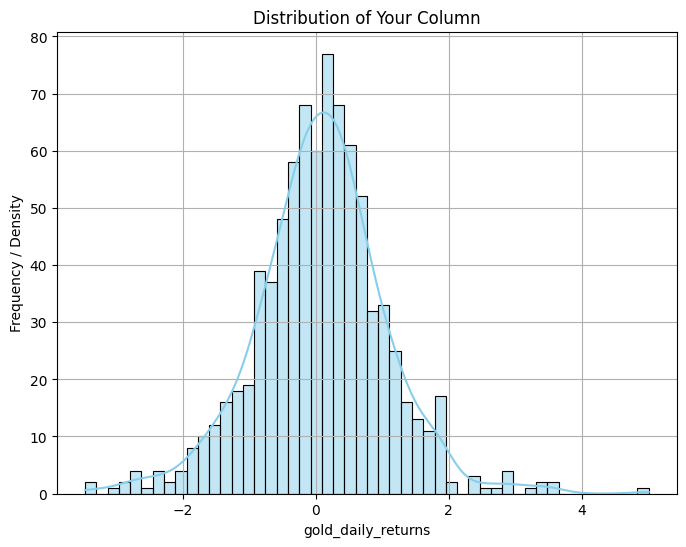

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df_merged_compare['Daily_Return_gold_close'], kde=True, color='skyblue', bins=50)
plt.title('Distribution of Your Column')
plt.xlabel('gold_daily_returns')
plt.ylabel('Frequency / Density')
plt.grid(True)
plt.show()

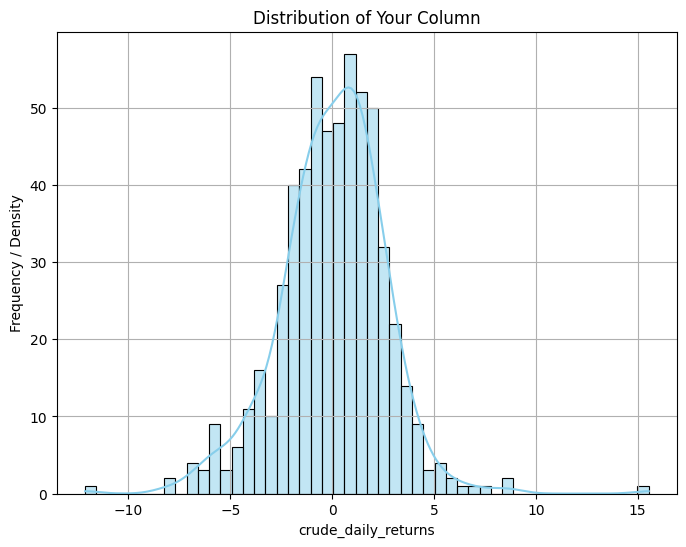

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df_merged_compare['Daily_Return_crude_close'], kde=True, color='skyblue', bins=50)
plt.title('Distribution of Your Column')
plt.xlabel('crude_daily_returns')
plt.ylabel('Frequency / Density')
plt.grid(True)
plt.show()

In [ ]:

df_merged_compare['Daily_Return_nifty_close'].describe()

# daily range of nifty can be +- std * current_price .

,Daily_Return_nifty_close
count,835.000000
mean,0.044505
std,0.890777
min,-5.618737
25%,-0.426091
50%,0.051619
75%,0.566221
max,3.667427


In [ ]:
%%markdown
"""


Mean-reversion setup: If early move stretches to ~+1σ without news and breadth is neutral, stalk fades back toward VWAP/prev close; stop just beyond ~1.25–1.5σ.

Breakout/momentum: If breadth, sector leaders, or news push beyond 1.5–2σ and hold, switch to trend-following: buy pullbacks above prior breakout, trail below higher lows/VWAP.

Regime switch detector

A cluster of consecutive > |2σ| days ⇒ regime shift. Adapt: ATR-based stops, momentum plays, reduce mean-reversion attempts.

Sizing

Use volatility-scaled sizing: risk per trade (in ₹) / stop distance (pts) = lots.

If σ expands, size contracts automatically.
"""


In [ ]:
df_merged_compare['Daily_Return_gold_close'].describe()

,Daily_Return_gold_close
count,835.000000
mean,0.076923
std,0.979779
min,-3.464271
25%,-0.478547
50%,0.098861
75%,0.622520
max,5.003455


In [ ]:
df_merged_compare['Daily_Return_crude_close'].describe()

,Daily_Return_crude_close
count,574.000000
mean,0.035835
std,2.598208
min,-12.126112
25%,-1.454156
50%,0.239364
75%,1.657748
max,15.545338


In [ ]:
corr = df_merged_compare['Daily_Return_nifty_close'].corr(df_merged_compare['Daily_Return_gold_close'])
print("Daily return correlation:", corr)

Daily return correlation: 0.0600760244476615


In [ ]:
%%markdown
"""
1. Relationship is basically negligible

0.06 means there’s almost no linear co-movement in daily returns.

On a given day, knowing what Gold did won’t really help predict Nifty’s daily move.

2. Diversification benefit

Since they’re almost uncorrelated, holding Gold alongside Nifty reduces portfolio volatility (because drawdowns in one aren’t strongly mirrored in the other).

This is why many long-term investors keep gold as a hedge.
"""

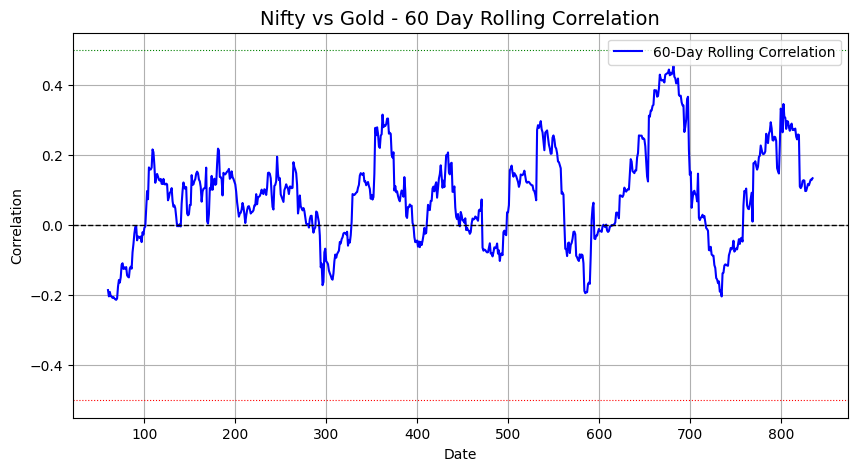

In [ ]:
df['RollingCorr_60d'] = df_merged_compare['Daily_Return_nifty_close'].rolling(window=60).corr(df_merged_compare['Daily_Return_gold_close'])

# Plot
plt.figure(figsize=(10,5))
plt.plot(df.index, df['RollingCorr_60d'], label='60-Day Rolling Correlation', color='blue')
plt.axhline(0, color='black', linewidth=1, linestyle='--')
plt.axhline(0.5, color='green', linewidth=0.8, linestyle=':')
plt.axhline(-0.5, color='red', linewidth=0.8, linestyle=':')
plt.title("Nifty vs Gold - 60 Day Rolling Correlation", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Correlation")
plt.legend()
plt.grid(True)
plt.show()

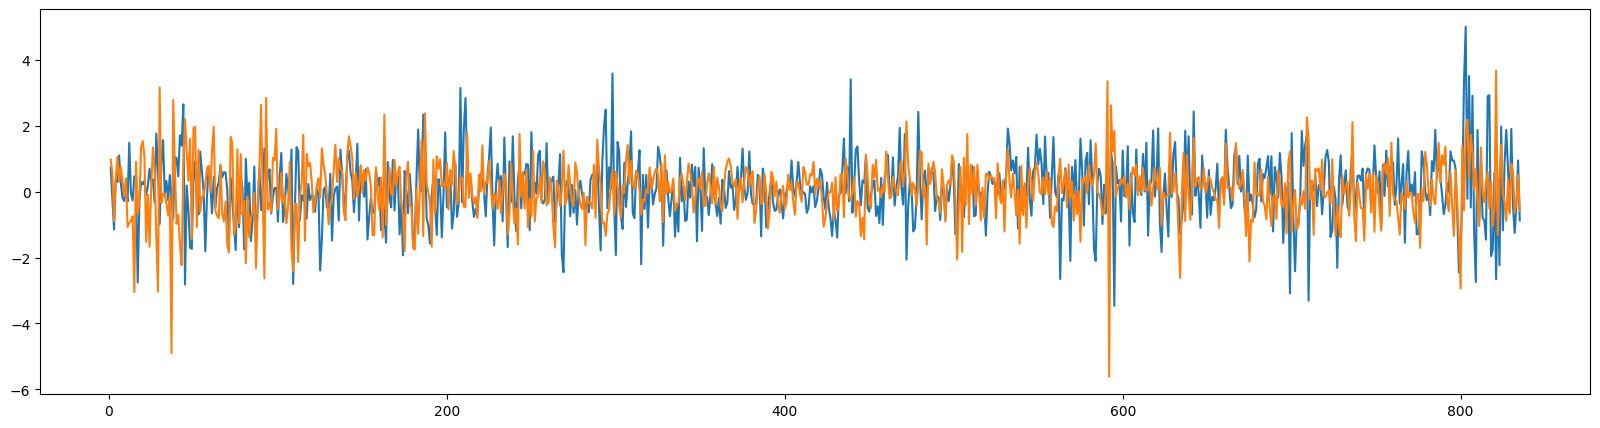

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(df_merged_compare['Daily_Return_gold_close'])
plt.plot(df_merged_compare['Daily_Return_nifty_close'])

In [ ]:
corr = df_merged_compare['Daily_Return_nifty_close'].corr(df_merged_compare['Daily_Return_crude_close'])
print("Daily return correlation:", corr)

Daily return correlation: 0.0008288853047870247


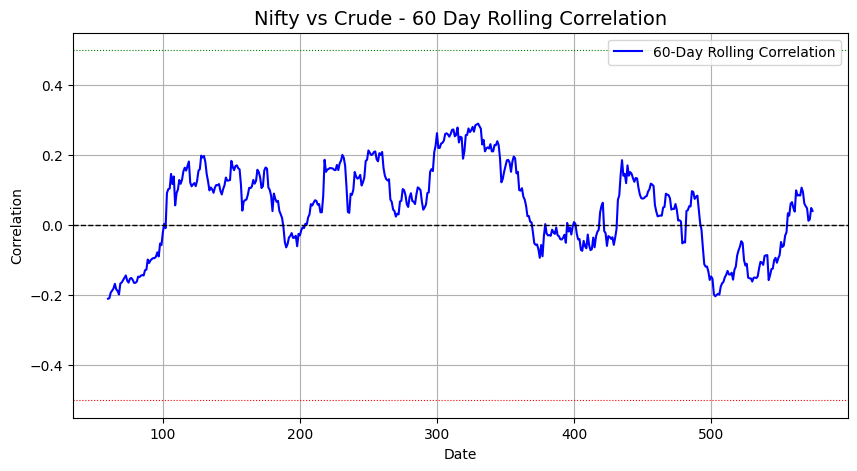

In [ ]:
df['RollingCorr_60d'] = df_merged_compare['Daily_Return_nifty_close'].rolling(window=60).corr(df_merged_compare['Daily_Return_crude_close'])

# Plot
plt.figure(figsize=(10,5))
plt.plot(df.index, df['RollingCorr_60d'], label='60-Day Rolling Correlation', color='blue')
plt.axhline(0, color='black', linewidth=1, linestyle='--')
plt.axhline(0.5, color='green', linewidth=0.8, linestyle=':')
plt.axhline(-0.5, color='red', linewidth=0.8, linestyle=':')
plt.title("Nifty vs Crude - 60 Day Rolling Correlation", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Correlation")
plt.legend()
plt.grid(True)
plt.show()